In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import timeit
from LU_fact import lu

In [41]:
def tri_solve_back(R, b):
    """Solves a system of linear equations via backwards substitution
    Args:
        R (np.array): upper triangular matrix
        b (np.array): input vector
    Returns:
        np.array: output vector
    """
    n = R.shape[1]
    x= np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - (np.dot(R[i,:],x))) / R[i, i]
    return x

In [13]:
def tri_solve_forw(L, b):
    """Solves a system of linear equations
    Args:
        L (np.array): lower triangular matrix
        b (np.array): input vector
    Returns:
        np.array: output vector
    """
    n = L.shape[0]
    x= np.zeros((n, 1))
    for i in range(n):
        x[i, 0] = (b[i] - (np.sum(L[i, :i] * x[:i, 0]))) / L[i, i]
    return x

#### Source: Alessandro Coretti

$$

M x = b \\
M = LU \\
Ly = b \\
Ux = y \\

$$

In [38]:
def LU_solve(M, b):
    M = lu(M, pv = True)[0]
    n = M.shape[0]
    
    L = np.eye(n) + np.tril(M, k = -1)

    U = np.triu(M)
    np.lu
    y = tri_solve_forw(L, b)
    x = tri_solve_back(U, y)
    
    return x

In [46]:
M = np.array(([
        7, 3, -1, 2
    ],[
        3, 8, 1, -4
    ],[
        -1, 1, 4, -1
    ],[
        2, -4, -1, 6
    ]), dtype = float)
b = np.array([1, 2, 3, 4], dtype = float)

x  = LU_solve(M, b)

[-1.27619048  1.87619048  0.57142857  2.43809524]


In [92]:
def benchmark(n):
    t = np.zeros(n)
    for i in range(3, n):
        M = np.random.rand(i,i)
        b = np.random.rand(i)
        t[i] = timeit.timeit("LU_solve(M, b)", globals={"M": M, "b": b, "LU_solve" : LU_solve}, number = 10)
    return t
time = benchmark(500)

# M = np.random.rand(10,10)
# b = np.random.rand(10)
# LU_solve(M, b)
# timeit.repeat("LU_solve(M, b)", globals={"M": M, "b": b, "LU_solve" : LU_solve}, number = 10)

KeyboardInterrupt: 

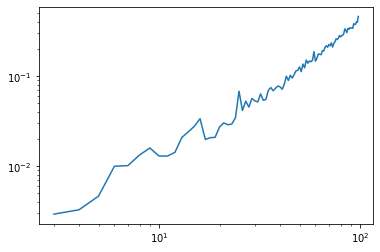

In [91]:
time
t = np.arange(3,99)
plt.plot(t, time)
plt.xscale("log")
plt.yscale("log")